
# A Unified Approach to Web Scraping 🌐

#### 1. **Laying the Groundwork**:
Every mission needs a clear objective. Khan Academy is a reservoir of educational content. Imagine its vast library as a series of interconnected textbooks. Each lesson is like a chapter, and our goal is to digitally 'link' these textbooks, extracting their essence for our data needs.

#### 2. **Reconnaissance - The Digital Marco Polo**:
Much like the game of Marco Polo, where one player calls out "Marco!" and others respond with "Polo!", web scraping is about sending a probe and waiting for a response. Using browser developer tools, we 'call out' to the website, inspecting elements and deciphering its structure. Often, elements like the 'Load More' button are hidden gems that we need to uncover for effective scraping.

Here is a quick video showing the method in action:

{{< video https://youtu.be/WxKb9gDQt94 >}}

#### 3. **Crafting the Toolset**:
With insights from manual inspection, we turn to ChatGPT. By providing specific HTML elements, we get back Python functions, tailor-made for data extraction.

Once we have the HMTL elements of interest copied:
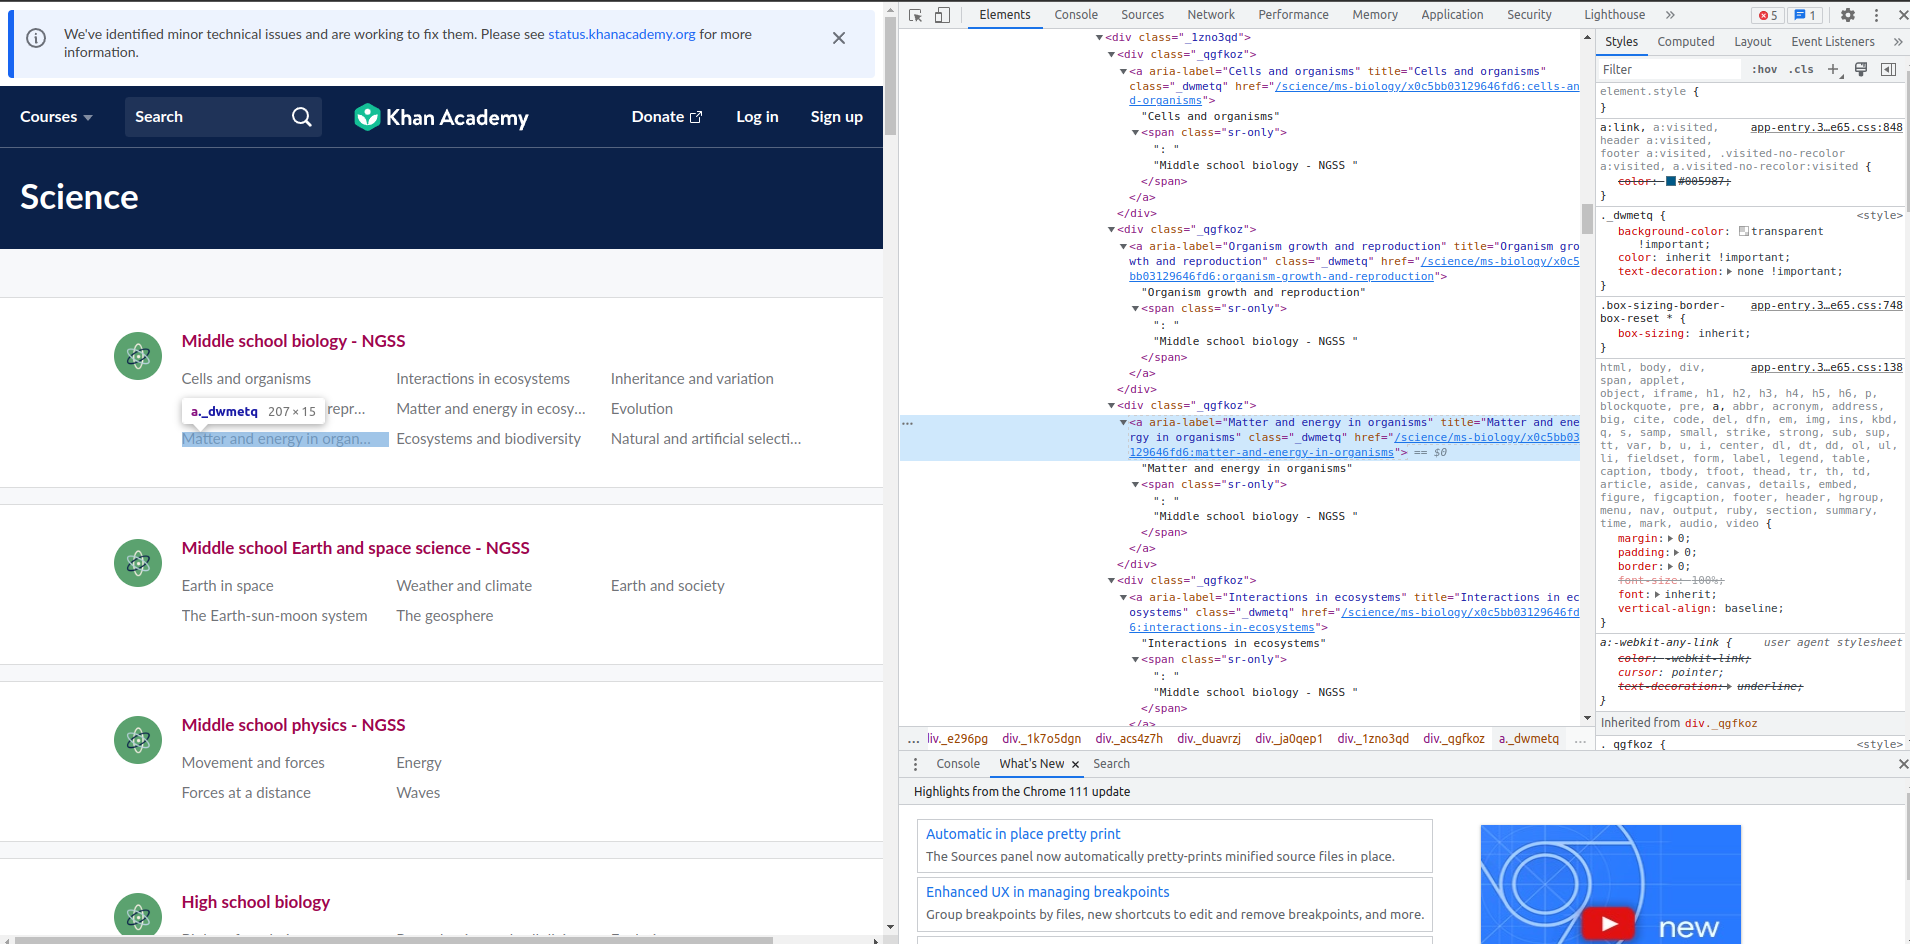

We can feed them into ChatGPT:

!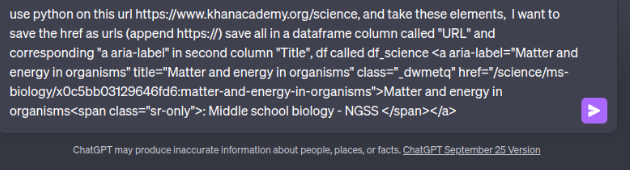

#### 4. **Iterative Building - Traversing the Digital Tree**:

Web scraping is akin to exploring a vast digital forest. Each website represents a unique tree within this forest, and the goal is to traverse from the leaves (finest details) to the root (landing or home page), gathering valuable data along the way.

For an effective traversal:

1. **Start Small, Think Big**:
   Begin by targeting a specific, granular detail on the website. This could be a single article, a forum post, or a lesson. By mastering the extraction process at this micro-level, you lay the groundwork for larger, more complex scraping tasks.

   *Example from Khan Academy*: 
   ```python
   def get_lesson_details(url):
       driver.get(url)
       content = driver.find_element_by_xpath('//div[@class="perseus-renderer"]').text
       return content
   ```
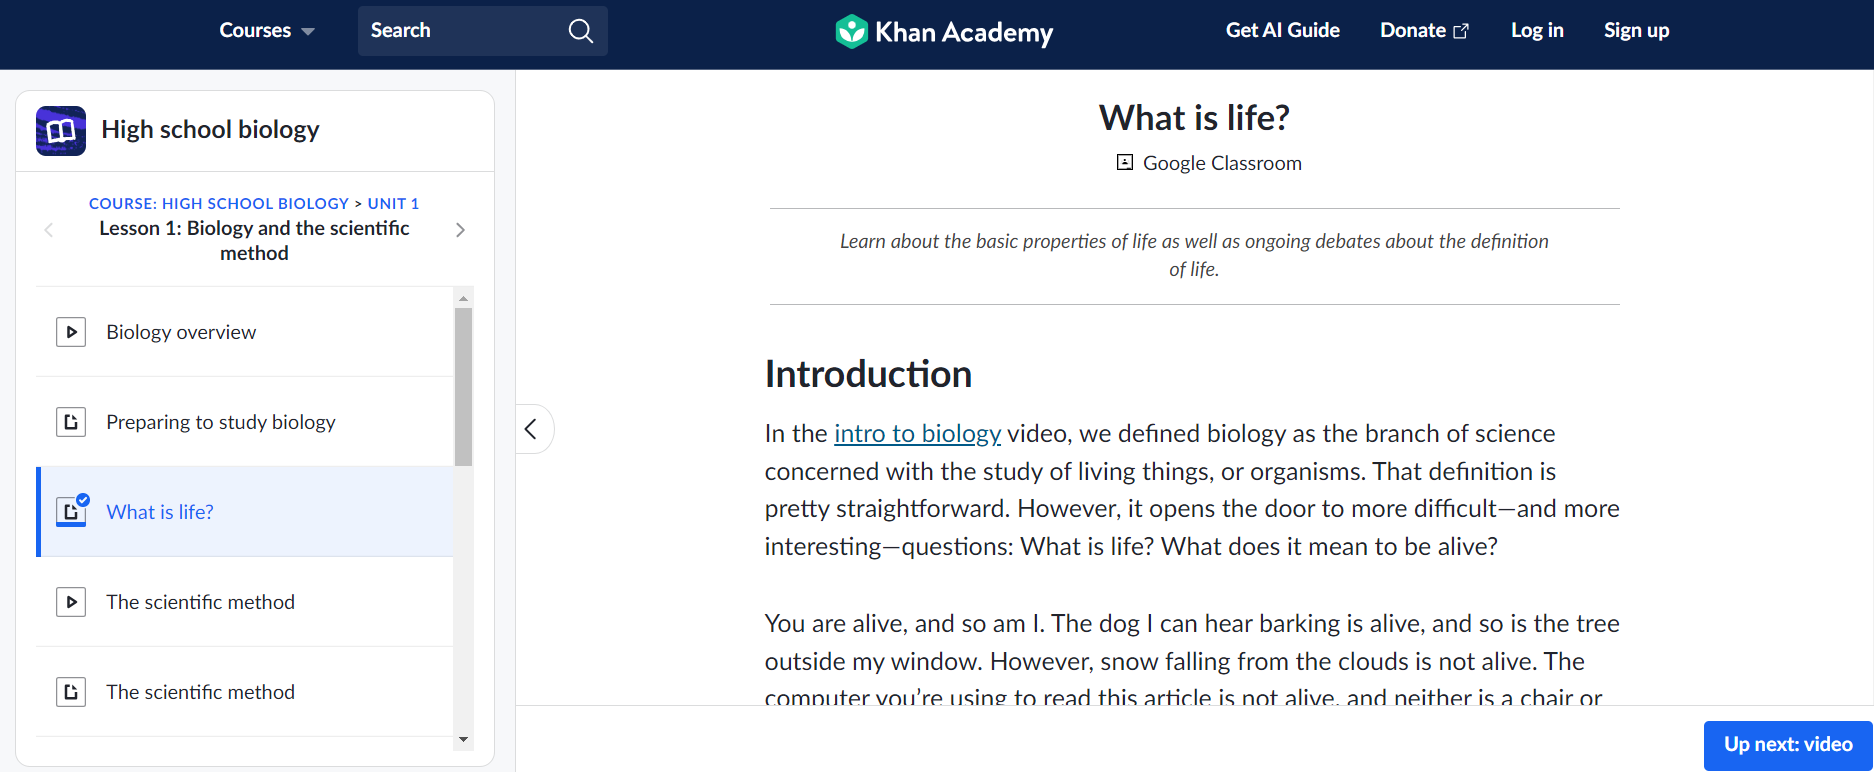


2. **Branch Out**:
   Once you've successfully extracted details from the 'leaf' level, start branching out. Explore related content within the same category or section. This could involve scraping all lessons within a particular topic or all posts within a forum thread.

   *Example from Khan Academy*: 
   ```python
   def get_topic_details(url):
       driver.get(url)
       lesson_links = driver.find_elements_by_xpath('//a[@class="link_1uvuyao-o_O-nodeStyle_j7os3g-o_O-nodeStyleHighlight_aacz5b"]')
       topic_content = [get_lesson_details(link.get_attribute('href')) for link in lesson_links]
       return topic_content
   ```
   
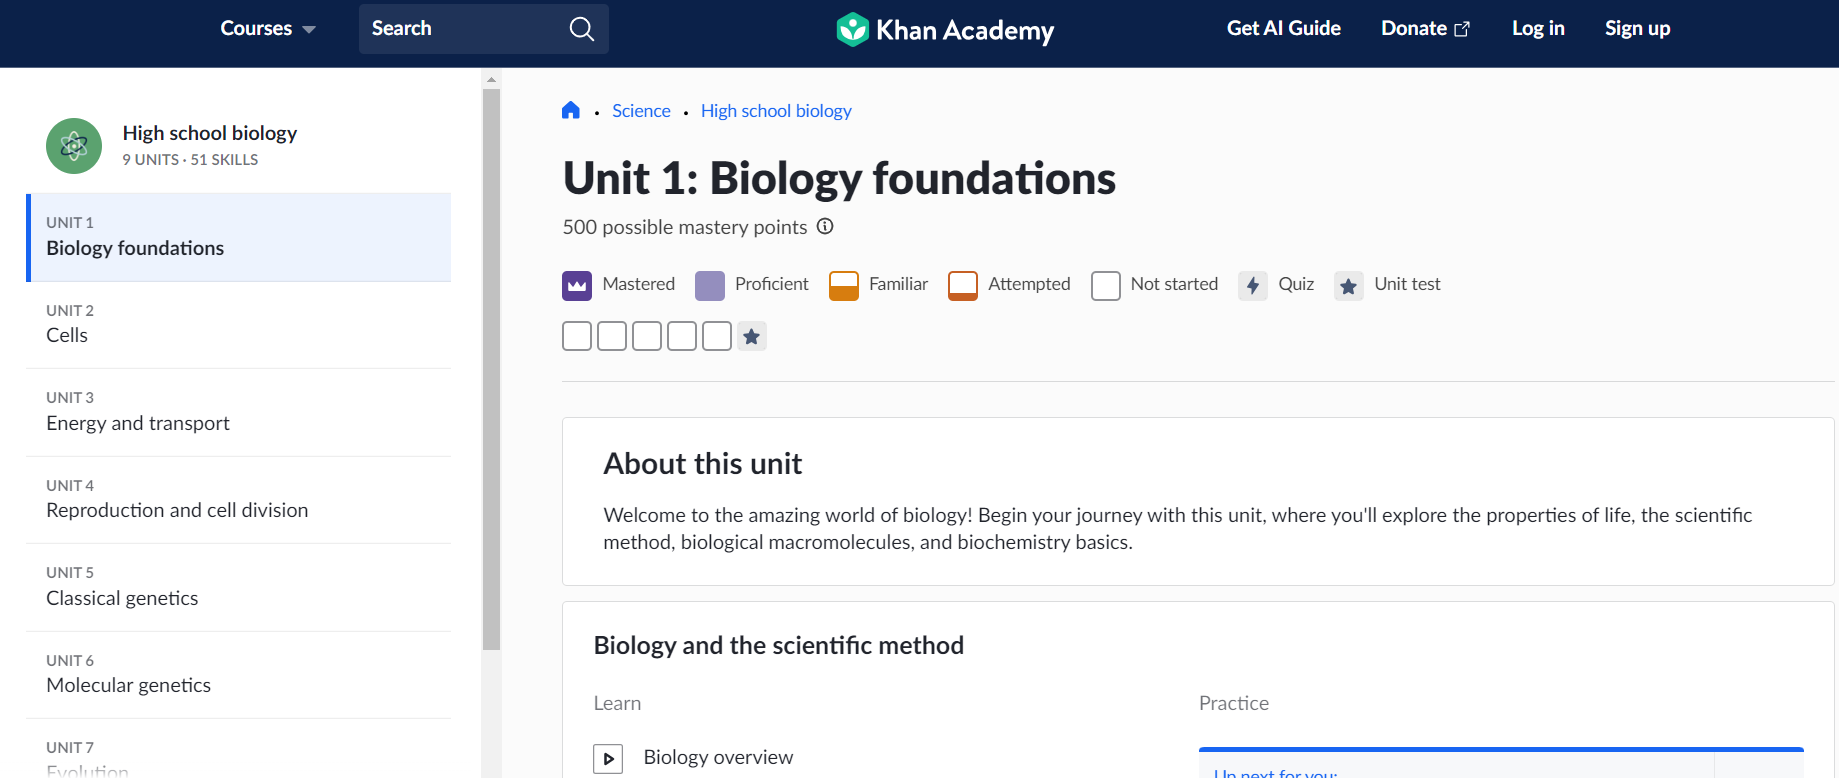

3. **Connect the Dots**:
   As you move further up the 'tree', look for patterns and connections. Understand how different sections or categories are linked. This interconnectedness will guide your scraping journey, ensuring you capture a holistic snapshot of the website's content.

   *Example from Dell IT Support*: 
   ```python
   def extract_thread_details(url):
       driver.get(url)
       post_links = driver.find_elements_by_xpath('//div[@class="lia-thread-topic"]//a[@class="page-link lia-link-navigation lia-custom-event"]')
       thread_content = [extract_post_text(link.get_attribute('href')) for link in post_links]
       return thread_content
   ```

4. **Reach the Root**:
   With detailed insights from the branches and leaves, navigate back to the landing or home page. This final step should encapsulate all the data extraction methods you've developed, offering a comprehensive view of the website's content.

   *Example from Khan Academy*: 
   ```python
   def navigate_to_khan_landing(url):
       driver.get(url)
       topic_links = driver.find_elements_by_xpath('//a[@class="link_1uvuyao-o_O-nodeStyle_j7os3g-o_O-nodeStyleHighlight_aacz5b"]')
       landing_content = [get_topic_details(link.get_attribute('href')) for link in topic_links]
       return landing_content
   ```
   
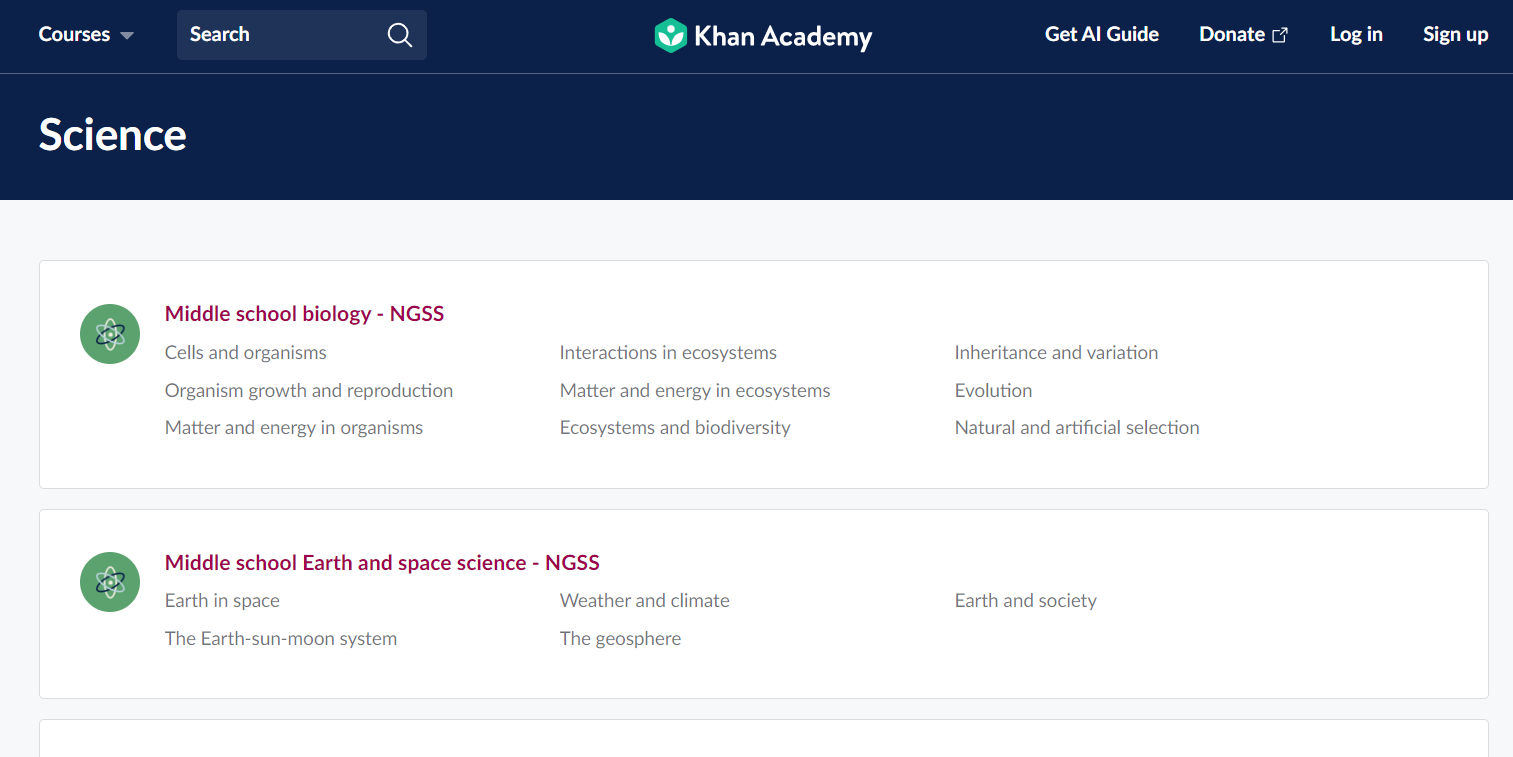


5. **Iterate and Refine**:
   Web scraping is rarely a one-shot process. As you traverse the digital tree, you'll likely encounter challenges or discover more efficient paths. Continuously iterate on your methods, refining and optimizing as you delve deeper into the forest.

---

By adopting an iterative building approach, you ensure thoroughness and efficiency in your web scraping endeavors. It's about mastering the micro to effectively navigate the macro. Each step, each function, is a stepping stone, guiding you through the vast digital terrain.

#### 5. **Harvest, Refine, and Polish**:
Post extraction, data needs cleansing. This includes handling placeholders like `[URL]`, removing Personal Identifiable Information (PII) such as names (often found adjacent to "@" symbols), and dealing with missing values.

```python
# Data cleaning code

def clean_data(data_list):
    cleaned_data = []

    for data in data_list:
        # Remove URL placeholders
        data = data.replace('[URL]', '')

        # Remove PII (names associated with '@')
        if '@' in data:
            continue
        
        # Remove NaN or empty entries
        if not data:
            continue

        cleaned_data.append(data)

    return cleaned_data

# Assuming 'raw_data' is the list of extracted data
cleaned_data = clean_data(raw_data)

# Convert the cleaned data into a CSV format
import pandas as pd
df = pd.DataFrame(cleaned_data)
df.to_csv('cleaned_data.csv', index=False)

```

### 6. Challenges - The Twists and Turns of Web Scraping:

Navigating the digital realm in pursuit of data treasures is not without its share of challenges. These hurdles test the resilience of your scraper, and by extension, your problem-solving mettle. Here are some of the challenges we encountered and the lessons they taught:

#### 1. **Ever-Changing Web Landscapes**:

Websites evolve. Whether it's a design overhaul or a restructuring of content, these changes can render a previously efficient scraper ineffective. A prime example from our journey was with the Dell IT Support site. When I last scraped the site, all forum posts, including the "solved" ones, were housed together. Fast forward to now, and the "solved posts" have been segregated into their own section. A scraper tailored for the earlier structure would be obsolete today. Such changes emphasize the importance of regular scraper maintenance and adaptability.
   
   [Check out this earlier scraping approach which is now obsolete due to site changes.](https://c123ian.github.io/posts/SQuAD/squad.html)

#### 2. **The Wild Card of User-Generated Content**:

When dealing with platforms that allow user contributions, you're diving into unpredictable waters. Without stringent formatting rules, users might introduce content that throws a wrench in your scraping logic. From embedding multimedia to using a whirlwind of emojis and special characters, user-generated content is a wild card. During our scraping mission, one such unexpected content format almost derailed a nearly complete scraping method!
   
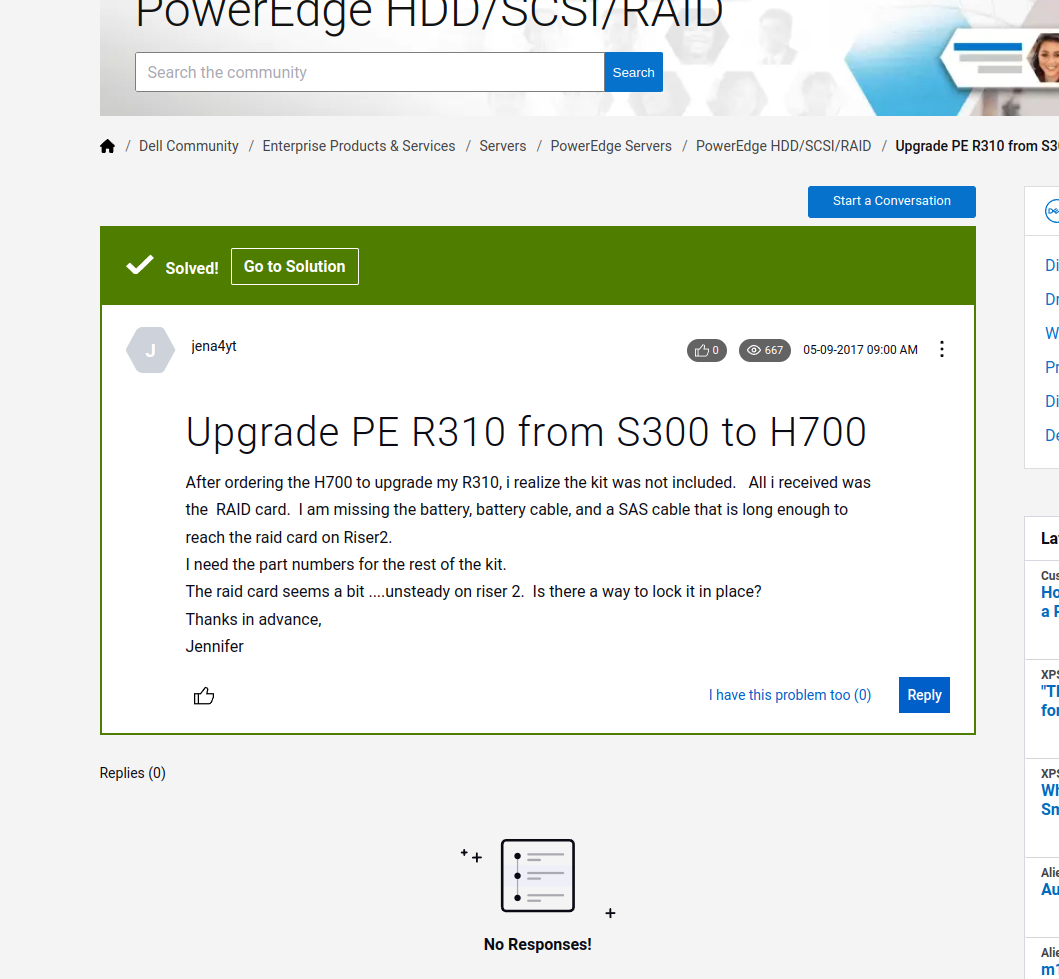

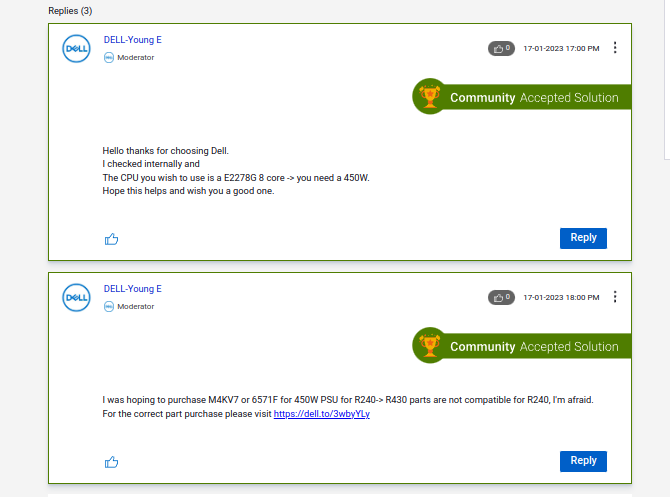


#### 3. **The Delicate Art of Data Cleaning**:
   Post extraction, the challenge shifts to refining this raw harvest. Decisions made during this phase profoundly impact the usability and quality of the data. For instance, URLs in the content: Are they useful metadata, or do they risk confusing a machine learning model? And what about images? Should they be omitted entirely or replaced with a placeholder like `[IMAGE]`?
   
Name extraction poses its own set of challenges. Using the "@" character as a heuristic to remove names is handy but not exhaustive. Turning to a list of real names for cleaning is tempting but fraught with pitfalls. Common words that double as names, like "Will", might get erroneously removed, distorting the data's meaning.

---

### Wrapping Up:

In web scraping, it's often wise to cast a wide net. For instance, even though the community Q&A on Khan Academy wasn't the primary focus, we extracted it—because, why not? Always gather more data than you think you'll need.

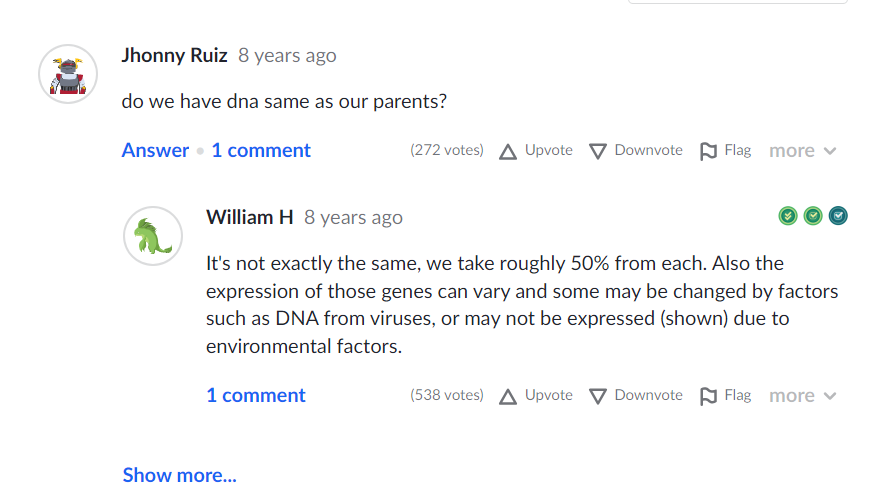

```python
def extract_community_qa(url):
    """
    Extract community Q&A content from a given Khan Academy page.
    
    Args:
    - url (str): The URL of the Khan Academy page with community Q&A.
    
    Returns:
    - list[dict]: A list of dictionaries, where each dictionary contains a question and its answer(s).
    """
    driver.get(url)
    
    # Find all question elements on the page. The specific XPath would depend on the actual structure.
    question_elements = driver.find_elements_by_xpath('//div[@class="qa-question"]')  # Placeholder XPath
    
    # Initialize a list to store Q&A pairs.
    qa_content = []
    
    for q_elem in question_elements:
        # Extract the text of the question.
        question_text = q_elem.find_element_by_xpath('.//div[@class="question-text"]').text  # Placeholder XPath
        
        # Extract corresponding answer(s).
        answer_elements = q_elem.find_elements_by_xpath('.//div[@class="answer-text"]')  # Placeholder XPath
        answers = [answer_elem.text for answer_elem in answer_elements]
        
        # Append the Q&A pair to our content list.
        qa_content.append({
            'question': question_text,
            'answers': answers
        })
    
    return qa_content

```

Having data reserves can be invaluable for unforeseen projects down the line. The digital realm is vast and filled with treasures; dive in, gather generously, and let your data trove be the cornerstone of future innovations.

